<a href="https://colab.research.google.com/github/keremerkengel/mnist-el-yazisi-tanima/blob/main/El_Yaz%C4%B1s%C4%B1_Rakam_Tan%C4%B1ma_(MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import mnist

# Eğitim ve test verisini yüklüyoruz
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Boyutları yazdırıyoruz
print("Eğitim verisi:", x_train.shape)
print("Test verisi:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Eğitim verisi: (60000, 28, 28)
Test verisi: (10000, 28, 28)


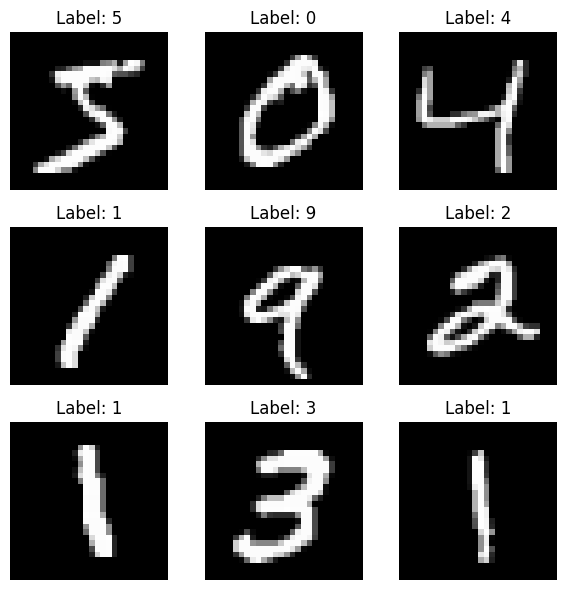

In [ ]:
# İlk 9 görseli yazdırıyoruz
plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# Normalleştir (0-255 yerine 0-1 aralığına)
x_train = x_train / 255.0
x_test = x_test / 255.0

# 28x28 = 784 düzleştir (neuronlara aktarım için)
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),  # İlk katman
    Dense(64, activation='relu'),                        # Orta katman
    Dense(10, activation='softmax')                      # Çıkış katmanı (0-9)
])


In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [22]:
model.fit(x_train, y_train, epochs=5, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8695 - loss: 0.4472 - val_accuracy: 0.9675 - val_loss: 0.1109
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9657 - loss: 0.1131 - val_accuracy: 0.9752 - val_loss: 0.0848
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9768 - loss: 0.0725 - val_accuracy: 0.9748 - val_loss: 0.0768
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9832 - loss: 0.0532 - val_accuracy: 0.9748 - val_loss: 0.0896
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9875 - loss: 0.0420 - val_accuracy: 0.9780 - val_loss: 0.0784


In [23]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Doğruluk Oranı: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9706 - loss: 0.0948
Test Doğruluk Oranı: 0.9744


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


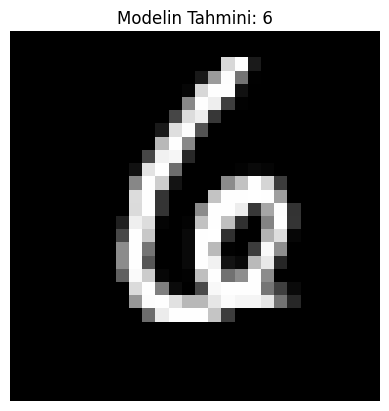

In [24]:
index = 123 # test verisinden bir örnek seçebilirsiniz
image = x_test[index].reshape(1, 784)

prediction = model.predict(image)
predicted_label = np.argmax(prediction)

# Görselleştir
plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
plt.title(f"Modelin Tahmini: {predicted_label}")
plt.axis('off')
plt.show()
